# Logarithmic Regression

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pd.set_option('display.max_columns', None)

In [2]:
with open('pickles/df.pkl', 'rb') as f:
    df = pickle.load(f)

# Creating a model. 

In [3]:
X = df.drop(["STAT_CAUSE_DESCR", 'STATE'] , axis='columns')
X = pd.get_dummies(columns=[ 
                            'SOURCE_SYSTEM_TYPE',
                            'FIRE_SIZE_CLASS',
                            'SOURCE_REPORTING_UNIT_NAME'
                           ], 
                   drop_first=True, data=X)

y = df['STAT_CAUSE_DESCR']

In [4]:
null_model = y.value_counts(normalize= True)
null_model

Lightning         0.379746
Negligence        0.260411
Infrastructure    0.188273
Arson             0.171570
Name: STAT_CAUSE_DESCR, dtype: float64

In [5]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

In [6]:
sc = StandardScaler()

Z_train = sc.fit_transform(X_train)

Z_test = sc.transform(X_test)


In [7]:
model_lr = LogisticRegression()
model_lr.fit(Z_train, y_train)
model_lr.score(Z_test, y_test)

/Users/ryan/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6329247270637809

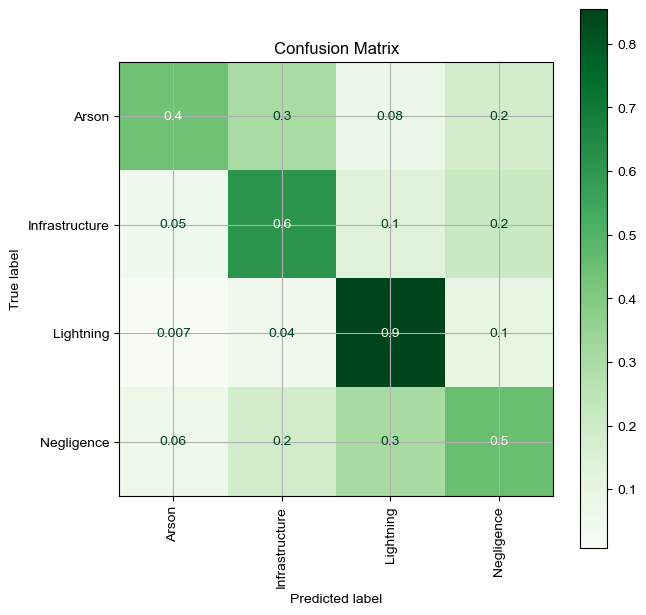

In [8]:
f,ax = plt.subplots(1,1,figsize=(7,7))

cm= ConfusionMatrixDisplay.from_estimator(model_lr,Z_test,y_test, cmap = 'Greens',normalize= 'true', xticks_rotation='vertical', values_format='.1g', ax=ax)
plt.title("Confusion Matrix")
sns.set(font_scale=.9)
plt.grid(None)

;
plt.rcParams["figure.edgecolor"] = "#FAEEDA"
plt.rcParams["figure.facecolor"] = "#FAEEDA"